In [1]:
# Specify location to FlavorPy files
directory_to_git_folder = "/home/alex/GitRepos/FlavorPy/flavorpy"
import os
os.chdir(os.path.expanduser(directory_to_git_folder))

import modelfitting as mf
import numpy as np
import pandas as pd

# Simple example

This example is supposed to serve as a quick start to the ModelFitting module of FlavorPy.

## Import FlavorPy

After installing FlavorPy with 'pip install flavorpy', import the modelfitting module.

In [16]:
## Import the modelfitting module of FlavorPy
#import flavorpy.modelfitting as mf
#
## We will also need numpy and pandas
#import numpy as np
#import pandas as pd

## Defining mass matrices

To define a model of leptons, we start by defining its mass matrices

$M_e = \begin{pmatrix} 0.0048\times0.0565 & 0 & 0 \\ 0 & 0.0565 & 0 \\ 0 & 0 & 1\end{pmatrix} \quad$ and
$\quad M_n = \begin{pmatrix} 1 & v_2 & v_3 \\ v_1 & 1 & v_3 \\ v_1 & v_2 & 1\end{pmatrix}$

For this example we have:

In [2]:
# Charged lepton mass matrix
def Me(params):
    v1, v2, v3 = params['v1'], params['v2'], params['v3']
    return np.array([[0.0048*0.0565, 0 ,0], [0, 0.0565, 0], [0, 0, 1]])

# Neutrino mass matrix
def Mn(params):
    v1, v2, v3 = params['v1'], params['v2'], params['v3']
    return np.array([[1, v2, v3], [v1, 1, v3], [v1, v2, 1]])

## Defining parameterspace

Next, we define the parameterspace of our model. We therefore construct an empty parameter space and add the parameters to it. When fitting, we will draw random points within this parameter space.

In [3]:
ParamSpace = mf.ParameterSpace()
ParamSpace.add_dim(name='v1')
ParamSpace.add_dim(name='v2')
ParamSpace.add_dim(name='v3')

## Constructing Model

Then we can construct the lepton model as follows:

In [5]:
MyModel = mf.FlavorModel(mass_matrix_e=Me, mass_matrix_n=Mn, parameterspace=ParamSpace, ordering='NO')

Now we can determine the masses and mixing observables of a given point in parameter space by:

In [6]:
MyModel.get_obs({'v1': 1.5, 'v2': 1.1, 'v3': 1.3})

{'me/mu': 0.0048,
 'mu/mt': 0.0565,
 's12^2': 0.9053720503789906,
 's13^2': 0.2893377761696659,
 's23^2': 0.5280465699834944,
 'd/pi': 0.0,
 'r': 0.010306101829667999,
 'm21^2': 4.9968698643488846e-05,
 'm3l^2': 0.0048484576874298696,
 'm1': 0.0033969202435270816,
 'm2': 0.007842688683377208,
 'm3': 0.06971367695488995,
 'eta1': 1.0,
 'eta2': 1.0,
 'J': 0.0,
 'Jmax': 0.05585663171203268,
 'Sum(m_i)': 0.08095328588179423,
 'm_b': 0.03822289118358137,
 'm_bb': 0.025548760738177294,
 'nscale': 0.019258907884260646}

Here, 'me/mu' is the mass ratio of electron mass divided by muon mass, 'sij^2' refers to the mixing angles $\sin^2(\theta_{ij})$, 'd/pi' is the cp violating phase in the PMNS matrix divided by $\pi$, 'm21^2' and 'm3l^2' and the squared neutrino mass differences, i.e. mij^2 = m_i^2 - m_j^2, 'r' is their quotient r = m21^2 / m3l^2, 'm1' and 'm2' and 'm3' are the neutrino masses, 'eta1' and 'eta2' are the majorana phases, 'J' is the Jarskog determinant, 'm_b' and 'm_bb' are the effective neutrino masses for beta decay and neutrinoless double beta decay, respectively.

## Fitting model to experimental data

Let us now fit this model to a specific experimental data set. As a default the NuFit v5.3 for NO with SK data is used. To fit this model we choose for example 3 randomly drawn points in the parameter space and apply minimization algorithms to these points, in order to find a point that matches the experimental data well. Note that by default 4 minimization algorithms are applied consecutively to all 3 random points such that we get 12 points in the end.

In [7]:
pd.set_option('display.max_columns', None)  # This pandas setting allows us to see all columns

df = MyModel.make_fit(points=5)
df

,chisq,chisq_dimless,v1,v2,v3,n_scale,me/mu,mu/mt,s12^2,s13^2,s23^2,d/pi,r,m21^2,m3l^2,m1,m2,m3,eta1,eta2,J,Jmax,Sum(m_i),m_b,m_bb,nscale
0,5.653699,5.653322,5.028838,-0.526879,0.702169,1,0.0048,0.0565,0.305000,0.022280,0.499991,1.0,0.029592,0.000074,0.002506,0.002337,0.008922,0.050110,0.0,1.0,4.114302e-18,0.033596,0.061369,0.009222,0.005381,0.006863
1,5.653699,5.653322,5.028838,-0.526879,0.702169,1,0.0048,0.0565,0.305000,0.022280,0.499991,1.0,0.029592,0.000074,0.002506,0.002337,0.008922,0.050110,0.0,1.0,4.114302e-18,0.033596,0.061369,0.009222,0.005381,0.006863
2,5.653709,5.653322,5.028838,-0.526877,0.702170,1,0.0048,0.0565,0.305000,0.022280,0.499991,1.0,0.029592,0.000074,0.002506,0.002337,0.008922,0.050110,0.0,1.0,4.114302e-18,0.033596,0.061369,0.009222,0.005381,0.006863
3,5.653710,5.653322,5.028838,-0.526877,0.702170,1,0.0048,0.0565,0.305000,0.022280,0.499991,1.0,0.029592,0.000074,0.002506,0.002337,0.008922,0.050110,0.0,1.0,4.114302e-18,0.033596,0.061369,0.009222,0.005381,0.006863
4,5.655710,5.655561,5.049656,-0.534967,0.713021,1,0.0048,0.0565,0.309623,0.022200,0.500034,1.0,0.029595,0.000074,0.002505,0.002402,0.008940,0.050112,0.0,1.0,4.124460e-18,0.033679,0.061453,0.009246,0.005457,0.006835
5,5.655710,5.655561,5.049656,-0.534967,0.713021,1,0.0048,0.0565,0.309623,0.022200,0.500034,1.0,0.029595,0.000074,0.002505,0.002402,0.008940,0.050112,0.0,1.0,4.124460e-18,0.033679,0.061453,0.009246,0.005457,0.006835
6,5.655719,5.655559,5.049658,-0.534960,0.713025,1,0.0048,0.0565,0.309623,0.022200,0.500035,1.0,0.029594,0.000074,0.002505,0.002402,0.008940,0.050112,0.0,1.0,4.124460e-18,0.033679,0.061454,0.009246,0.005457,0.006835
7,5.655772,5.655592,5.049676,-0.534959,0.713025,1,0.0048,0.0565,0.309623,0.022200,0.500035,1.0,0.029594,0.000074,0.002505,0.002402,0.008940,0.050112,0.0,1.0,4.124446e-18,0.033679,0.061454,0.009246,0.005457,0.006835
8,5.655772,5.655592,5.049676,-0.534959,0.713025,1,0.0048,0.0565,0.309623,0.022200,0.500035,1.0,0.029594,0.000074,0.002505,0.002402,0.008940,0.050112,0.0,1.0,4.124446e-18,0.033679,0.061454,0.009246,0.005457,0.006835
9,5.655853,5.655693,5.049702,-0.534967,0.713016,1,0.0048,0.0565,0.309622,0.022200,0.500034,1.0,0.029594,0.000074,0.002505,0.002402,0.008940,0.050112,0.0,1.0,4.124415e-18,0.033678,0.061454,0.009246,0.005457,0.006835


The fit yields a point with $\chi^2$ arround 5. Since $\chi^2=x$ can be interpreted as the specific point lying in the $\sqrt{x}\,\sigma$ confidence level region, this means that our point is outside the 2$\sigma$ but inside the 3$\sigma$ region of the experimental data. Let us take a look at the individual contributions to $\chi^2$ for the best-fit point by

In [23]:
MyModel.print_chisq(df.loc[0])

'me/mu': 0.0048,   chisq: 0.0
'mu/mt': 0.0565,   chisq: 0.0
's12^2': 0.30500000121100895,   chisq: 4.2032172992145e-08
's13^2': 0.02219999995440627,   chisq: 1.0523577958707064e-08
's23^2': 0.4999568484745416,   chisq: 2.9383389552791437
'd/pi': 1.0,   chisq: 2.71318
'm21^2': 7.414848837981547e-05,   chisq: 0.0003285239267222246
'm3l^2': 0.0025053616533515753,   chisq: 0.00010020584059472139
Total chi-square: 5.651947737602212


It looks like the $\sin^2\theta_{12}$, $\sin^2\theta_{13}$, $\Delta m_{21}^2$, and $\Delta m_{3\ell}^2$ are within their experimental 1$\sigma$ intervall. However, $\sin^2\theta_{23}$ and the CP phase $\delta_{\mathrm{CP}}/\pi$ are only within their experimental 2$\sigma$ intervall. On a side note, it is no surprise, that the CP phase is off, since it is always CP conserving due to the mass matrices being real. All errors then add up to our best-fit point of the model lying within the 3$\sigma$ confidence level region.

## MCMC fit to explore the minimum of the model

To explore the neighborhood of the minimum we use the emcee marcov chain monte carlo sampler.

In [24]:
df_mcmc = MyModel.mcmc_fit(df.loc[[0]], mcmc_steps=2000)
df_mcmc = MyModel.complete_fit(df_mcmc)

0 : 


100%|██████████| 2000/2000 [00:30<00:00, 65.16it/s]


## Plotting the results

We can plot the parameterspace and see the contour of the 3$\sigma$ CL region. The colormap is scaled in such a way that the 1$\sigma$ region, i.e. $\chi^2<1$, is green, the 2$\sigma$ region with $1<\chi^2<4$ is yellow, the 3$\sigma$ region with $4<\chi^2<9$ is orange, and anything white lies outside of the $5\sigma$ region.

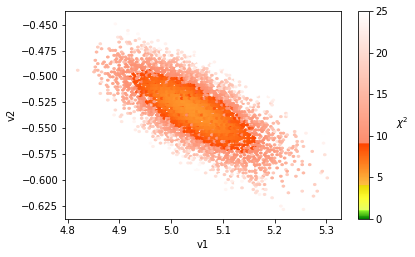

In [29]:
mf.plot(df_mcmc, x='v1', y='v2', vmin=0, vmax=25);

We can also plot the observables and their corresponding 1$\sigma$ and 3$\sigma$ CL bounds from NuFit v5.3, i.e. http://www.nu-fit.org/?q=node/278,

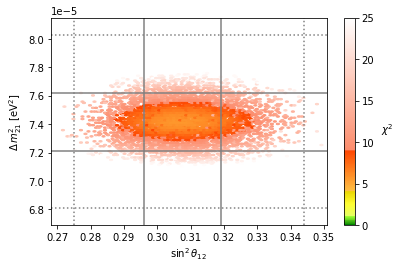

In [30]:
mf.plot(df_mcmc, x='s12^2', y='m21^2', show_exp='1dim', vmin=0, vmax=25);

but also the two dimensional $\chi^2$-profiles to get a better estimate of the CL regions for correlated, non-gaussian errors, e.g.

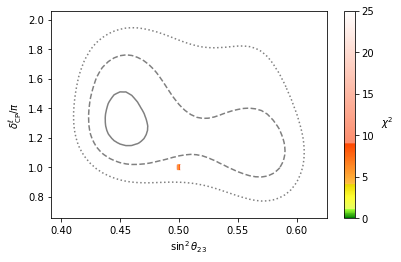

In [31]:
mf.plot(df_mcmc, x='s23^2', y='d/pi', show_exp='2dim', vmin=0, vmax=25, gridsize=8);

Note that our model spreads out the full 1$\sigma$ region of the well measured $\sin^2\theta_{12}$ and $\sin^2\theta_{13}$ while having a clear prediction for $\sin^2\theta_{23}$ and the CP-angle $\delta_{\mathrm{CP}}^\ell/\pi$, which have not yet been measured that precisely.

Also from the lobster plot we see a prediction for the lightest neutrino mass and the effective neutrion mass for neutrinoless double beta decay:

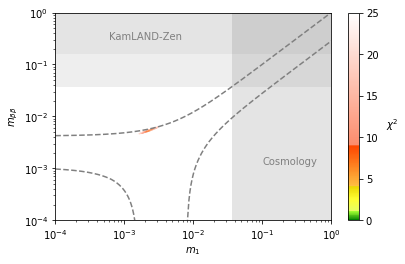

In [28]:
ax = mf.plot(df_mcmc, x='m1', y='m_bb', 
             ordering='NO', show_exp='2dim', xscale='log', yscale='log', vmin=0, vmax=25)
ax.axvspan(0.037,10, facecolor='gray',alpha=0.21); # arXiv: 2009.03287
ax.axhspan(0.156,10, facecolor='gray',alpha=0.21);  # arXiv: 2203.02139
ax.axhspan(0.036,0.156, facecolor='gray',alpha=0.13);  # arXiv: 2203.02139
ax.text(0.1,0.0012,'Cosmology', color='gray');
ax.text(0.0006,0.3,'KamLAND-Zen', color='gray');